In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(seed=1)
X_min = 4
X_max = 30
X_n = 16
X = 5 + 25 * np.random.rand(X_n)
Prm_c = [170, 108, 0.2]
T = Prm_c[0] - Prm_c[1] * np.exp(-Prm_c[2] * X) + 4 *np.random.randn(X_n)
np.savez('ch5_data.npz', X=X, X_min=X_min, X_max=X_max, X_n=X_n, T=T)

In [2]:
X0 = X
X0_min = 5
X0_max = 30
np.random.seed(seed=1)
X1 = 23 * (T/100) ** 2 + 2 * np.random.randn(X_n)
X1_min = 40
X1_max = 75

In [3]:
def mse_plane(x0, x1, t, w):
    y = w[0] * x0 + w[1] * x1 + w[2]
    mse = np.mean((y - t) ** 2)
    return mse

In [4]:
def dmse_plane(x0, x1, t, w):
    y = w[0] * x0 + w[1] * x1 +w[2]
    d_w0 = 2 * np.mean((y - t) * x0)
    d_w1 = 2 * np.mean((y - t) * x1)
    d_w2 = 2 * np.mean(y - t)
    return d_w0, d_w1, d_w2

In [5]:
def fit_plane_num(x0, x1, t):
    w_init =  [0.5, 0.5, 50]
    alpha = 0.0001 #학습률
    i_max = 1000000 #반복의 최대 횟수
    eps = 0.05 #반복 종료 기울기의 절대값의 한계
    w_i = np.zeros([i_max, 3])
    w_i[0, :] = w_init
    
    for i in range(1, i_max):
        dmse = dmse_plane(x0, x1, t, w_i[i-1])
        w_i[i, 0] = w_i[i - 1, 0] -alpha * dmse[0]
        w_i[i, 1] = w_i[i - 1, 1] -alpha * dmse[1]
        w_i[i, 2] = w_i[i - 1, 2] -alpha * dmse[2]
        
        if max(np.absolute(dmse)) < eps:
            break
            
        w0 = w_i[i, 0]
        w1 = w_i[i, 1]
        w2 = w_i[i, 2]
        w_i_hist = w_i[: i, :]
        
    return w0, w1, w2, dmse, w_i_hist

In [6]:
# 경사하강법 호출
W0, W1, W2, dMSE, W_history = fit_plane_num(X0, X1, T)

반복 횟수: 950781
MSE = 6.516010, SD = 2.553cm


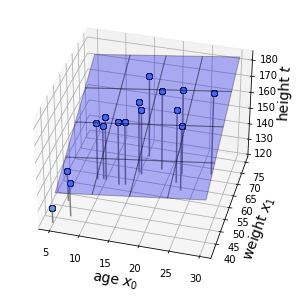

W0 = 0.434497, W1 = 1.116331, W2 = 87.606087


In [7]:
# 결과보기
print('반복 횟수: {0}'.format(W_history.shape[0]))
print('MSE = {0:.6f}, SD = {1:.3f}cm'.format( mse_plane(X0, X1, T, [W0, W1, W2]), np.sqrt(mse_plane(X0, X1, T, [W0, W1, W2])) ) )

def show_data2(ax, x0, x1, t):
    for i in range(len(x0)):
        ax.plot([x0[i], x0[i]], [x1[i], x1[i]], [120, t[i]], color='gray')
        ax.plot(x0, x1, t, 'o', color='cornflowerblue', markeredgecolor='black', markersize=6, markeredgewidth=0.5)
        ax.view_init(elev=35, azim=-75)

def show_plane(ax, w):
    px0 = np.linspace(X0_min, X0_max, 5)
    px1 = np.linspace(X1_min, X1_max, 5)
    px0, px1 = np.meshgrid(px0, px1)
    y = w[0] * px0 + w[1] * px1 +w[2]
    ax.plot_surface(px0, px1, y, rstride = 1, cstride = 1, alpha = 0.3, color='blue', edgecolor='black')

# 메인
plt.figure(figsize = (6, 5))
ax = plt.subplot(1, 1, 1, projection = '3d')
W = [W0, W1, W2]
show_plane(ax, W)
show_data2(ax, X0, X1, T)
ax.set_xlabel('age $x_0$', fontsize = 14)
ax.set_ylabel('weight $x_1$', fontsize = 14)
ax.set_zlabel('height $t$', fontsize = 14)
mse = mse_plane(X0, X1, T, W)
plt.show()
print('W0 = {0:.6f}, W1 = {1:.6f}, W2 = {2:.6f}'.format(W0, W1, W2))